In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [65]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df= pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [66]:
df.columns=['Recency', 'Frequency', 'Monetary','Time', 'Donated']
df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [67]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

In [68]:
X= df.drop('Donated',axis=1)
y= df['Donated']

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)


In [70]:
clf= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5,random_state=42)

clf.fit(X_train,y_train)
 

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [71]:
ypred = clf.predict(X_test)

accuracy= accuracy_score(y_test,ypred)
print('Accuracy:',accuracy)

Accuracy: 0.78


In [72]:
print(confusion_matrix(y_test,ypred))

[[108   5]
 [ 28   9]]


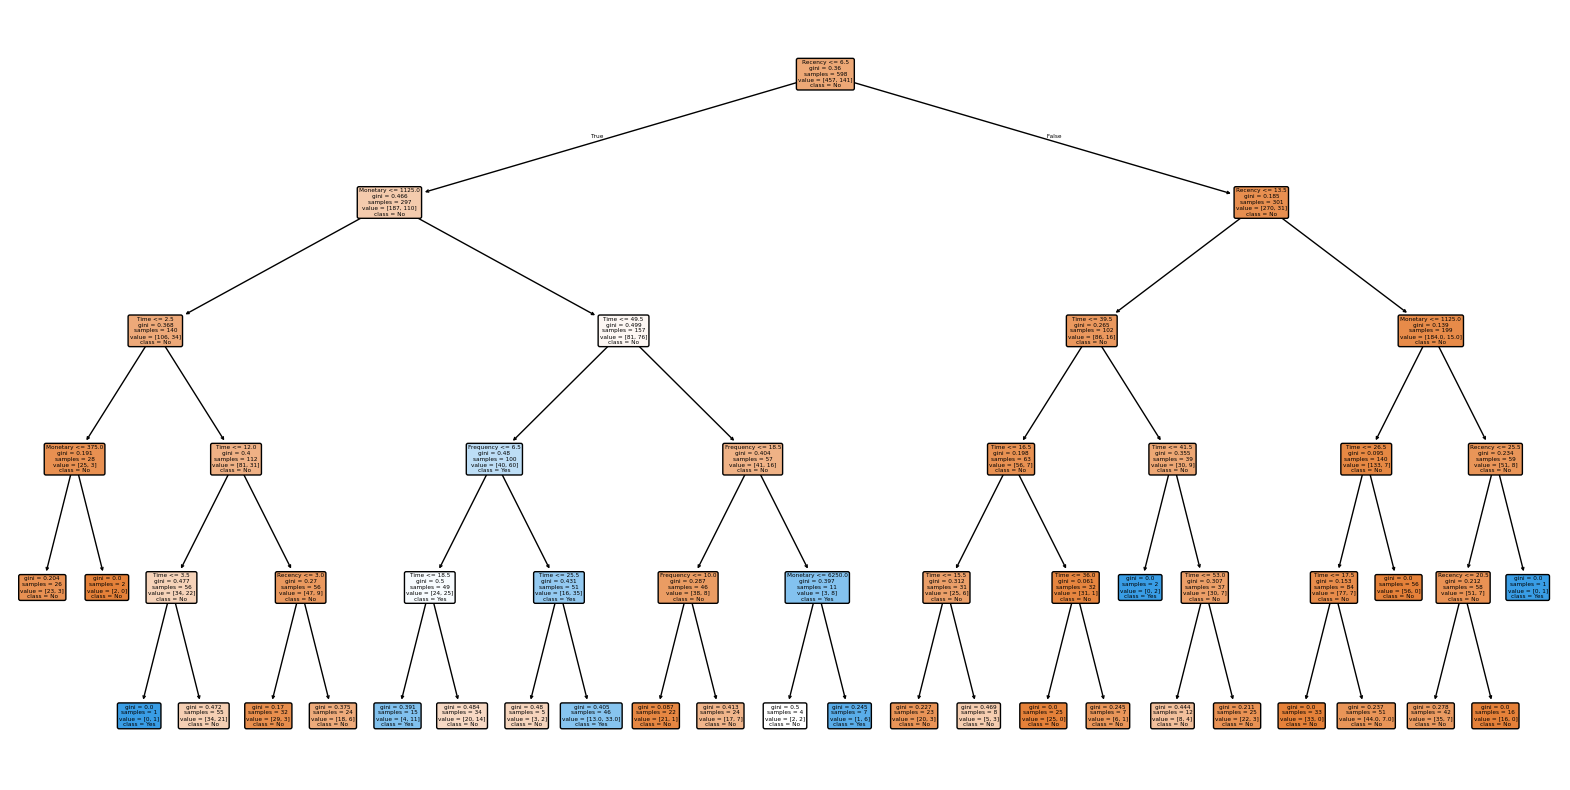

In [73]:
plt.figure(figsize=(20,10))

tree.plot_tree(clf,filled=True,rounded=True,class_names=['No','Yes'],feature_names=X.columns)
plt.show()

Hyper Parameter Tunning

In [74]:
params =[
    {'criterion':'gini','max_depth':5,'min_sample_split':5},
    {'criterion':'gini','max_depth':10,'min_sample_split':5},

    {'criterion':'gini','max_depth':5,"min_sample_split":5},
    {'criterion':'gini','max_depth':8,'min_sample_split':6},
    
]

In [75]:
for params in params:
    clf = DecisionTreeClassifier(criterion=params['criterion'], max_depth=params['max_depth'], min_samples_split=params['min_sample_split'],
                                 random_state=42 )
    clf.fit(X_train, y_train)
    ypred= clf.predict(X_test)
    accuracy=accuracy_score(y_test,ypred)
    print(f'parameter:{params}')
    print(f'Accuray: {accuracy:.2f}')
    print(confusion_matrix(y_test,ypred))

parameter:{'criterion': 'gini', 'max_depth': 5, 'min_sample_split': 5}
Accuray: 0.78
[[108   5]
 [ 28   9]]
parameter:{'criterion': 'gini', 'max_depth': 10, 'min_sample_split': 5}
Accuray: 0.66
[[88 25]
 [26 11]]
parameter:{'criterion': 'gini', 'max_depth': 5, 'min_sample_split': 5}
Accuray: 0.78
[[108   5]
 [ 28   9]]
parameter:{'criterion': 'gini', 'max_depth': 8, 'min_sample_split': 6}
Accuray: 0.69
[[93 20]
 [27 10]]


Decision Tree Regression

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
A= np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
b= np.array([2,4,6,8,10,12,14,16,18,20])

In [78]:
X_train,X_test,y_train,y_test=train_test_split(A,b,test_size=.2,random_state=42)

In [82]:
reg=DecisionTreeRegressor(max_depth=3,min_samples_split=5,random_state=42)
reg.fit(A,b)

DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=42)

In [85]:
bpred= reg.predict(A)

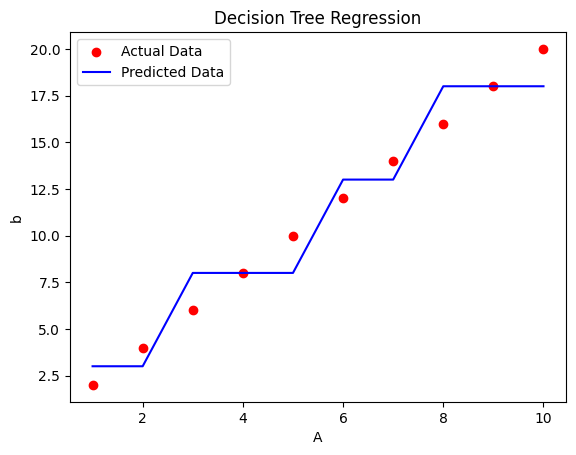

In [86]:
plt.scatter(A,b,color='red',label='Actual Data')
plt.plot(A,bpred,color='blue',label='Predicted Data')
plt.title('Decision Tree Regression')
plt.xlabel('A')
plt.ylabel('b')
plt.legend()
plt.show()

In [87]:
from sklearn.tree import plot_tree

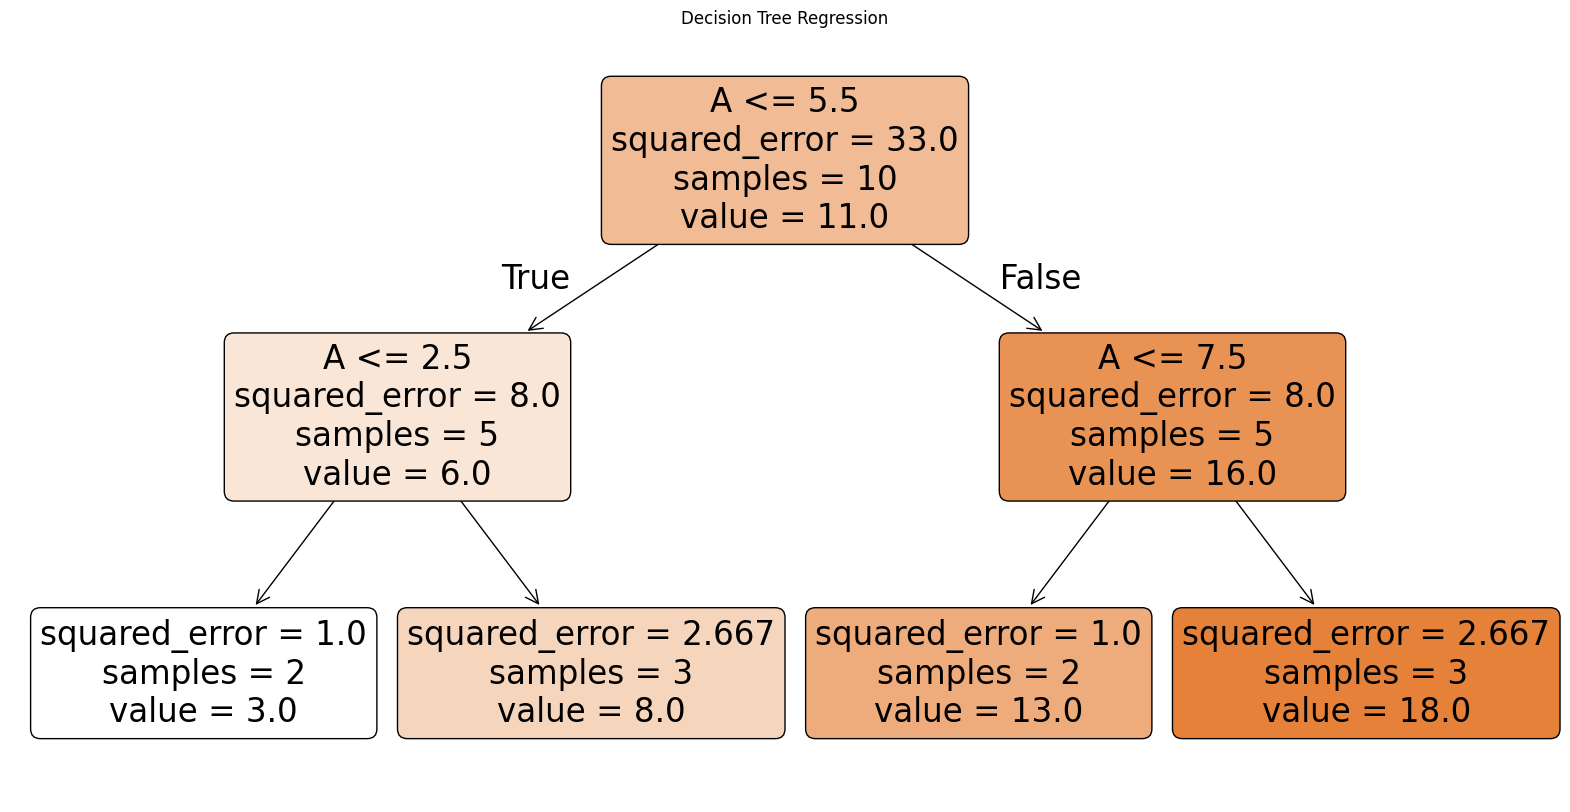

In [89]:
plt.figure(figsize=(20,10))
tree.plot_tree(reg,filled=True,rounded=True,class_names=['No','Yes'],feature_names=['A'])
plt.title('Decision Tree Regression')
plt.show()